In [1]:
import plotly.express as px
import os
import sys
import numpy as np
import scipy.stats as stats

%load_ext autoreload
%autoreload 2

In [2]:
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from experiments.result_buckets import roberta_specialized

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 30978.96it/s]


In [4]:
from experiments.adversarial_filtering.af import partition

### Abductive NLI

In [5]:
easy_anli, hard_anli = partition(roberta_specialized['anli-human'].buckets, lambda bucket: 'easy' in bucket.original_example_id)

# easy: 125, # hard: 125


In [7]:
print(easy_anli.linguistic_robustness_summary(roberta_specialized['anli-test']))
print(hard_anli.linguistic_robustness_summary(roberta_specialized['anli-test']))

{'consistency': 0.671142857142857, 'consistency_corrected': 0.8938481136748545, 'pove': 0.3815418182731729, 'pove_corrected': 0.5892202907045577}
{'consistency': 0.6899047619047619, 'consistency_corrected': 0.8628815240248716, 'pove': 0.38513225686479197, 'pove_corrected': 0.21537368350460384}


### Defeasible NLI

In [8]:
from experiments.adversarial_filtering.af import aflite_lookup

In [9]:
for d in ['snli', 'atomic', 'social']:
    print(d)
    easy_dnli, hard_dnli = partition(roberta_specialized[f'{d}-human'].buckets, lambda bucket: aflite_lookup[d][bucket.original_example_id] > 0.75)
    print('Easy:', easy_dnli.linguistic_robustness_summary(roberta_specialized[f'{d}-test']))
    print('Hard:', hard_dnli.linguistic_robustness_summary(roberta_specialized[f'{d}-test']))
    print()

snli
# easy: 125, # hard: 125
Easy: {'consistency': 0.6844285714285715, 'consistency_corrected': 0.9129631194376703, 'pove': 0.4849299945897179, 'pove_corrected': 0.4754900246270934}
Hard: {'consistency': 0.7260222222222221, 'consistency_corrected': 0.8998974329064149, 'pove': 0.501883962490586, 'pove_corrected': 0.33985010965510143}

atomic
# easy: 125, # hard: 125
Easy: {'consistency': 0.7348190476190475, 'consistency_corrected': 0.8296582651088149, 'pove': 0.47586885646867827, 'pove_corrected': 0.3111245482947203}
Hard: {'consistency': 0.7608825396825396, 'consistency_corrected': 0.8947229337106695, 'pove': 0.5613974727048101, 'pove_corrected': 0.5057515222943303}

social
# easy: 125, # hard: 125
Easy: {'consistency': 0.6508793650793652, 'consistency_corrected': 0.9308430602372846, 'pove': 0.45076263391839816, 'pove_corrected': 0.29457159090848056}
Hard: {'consistency': 0.66755873015873, 'consistency_corrected': 0.8844951431924365, 'pove': 0.48093257808531237, 'pove_corrected': 0.29

In [20]:
import seaborn as sns
import scipy

In [22]:
x = [aflite_lookup['snli'][b.original_example_id] for b in roberta_specialized['snli-human'].buckets] # AFLITE score
y = [b.bucket_correctness_variance for b in roberta_specialized['snli-human'].buckets] # correctness variance

scipy.stats.pearsonr(x, y)


PearsonRResult(statistic=-0.03888732438847302, pvalue=0.540529336590207)

<Axes: >

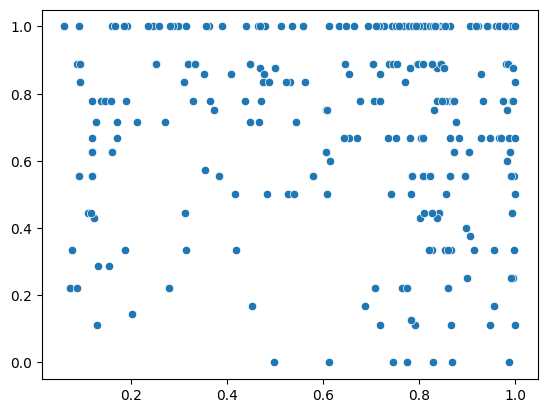

In [18]:
sns.scatterplot(x=x, y=y)